In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = "/content/drive/My Drive/result_train_validation/train&validation"

models = ['VGG16', 'Transformer_Gray', 'Transformer', 'ResNet18', 'AlexNet']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Must to set up the path correctly to point to train val loss and f1score csv file


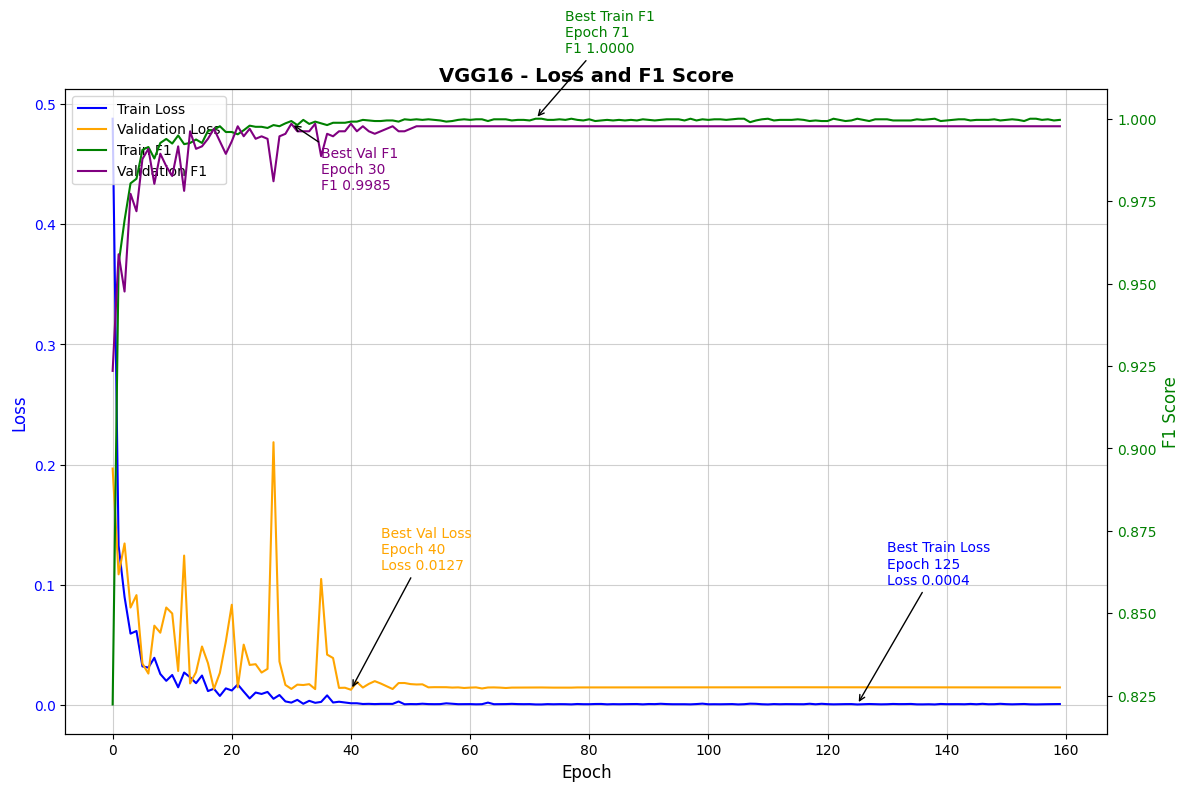

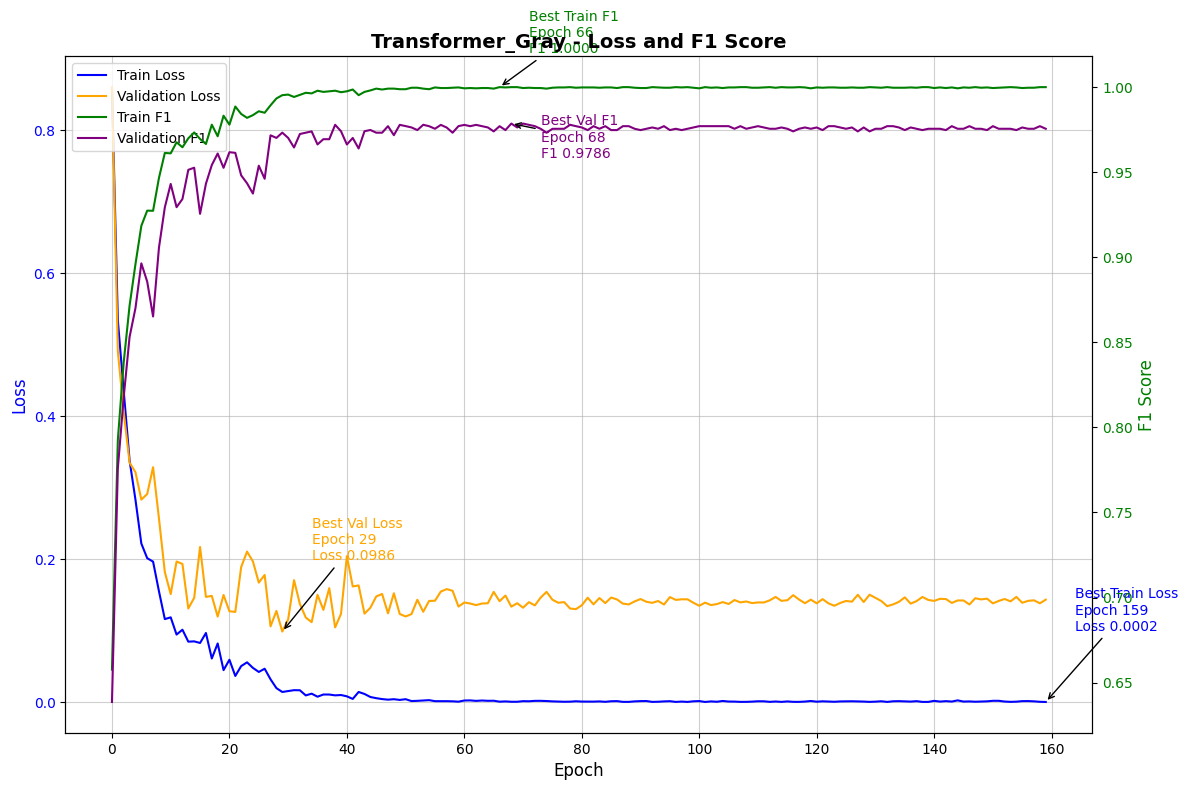

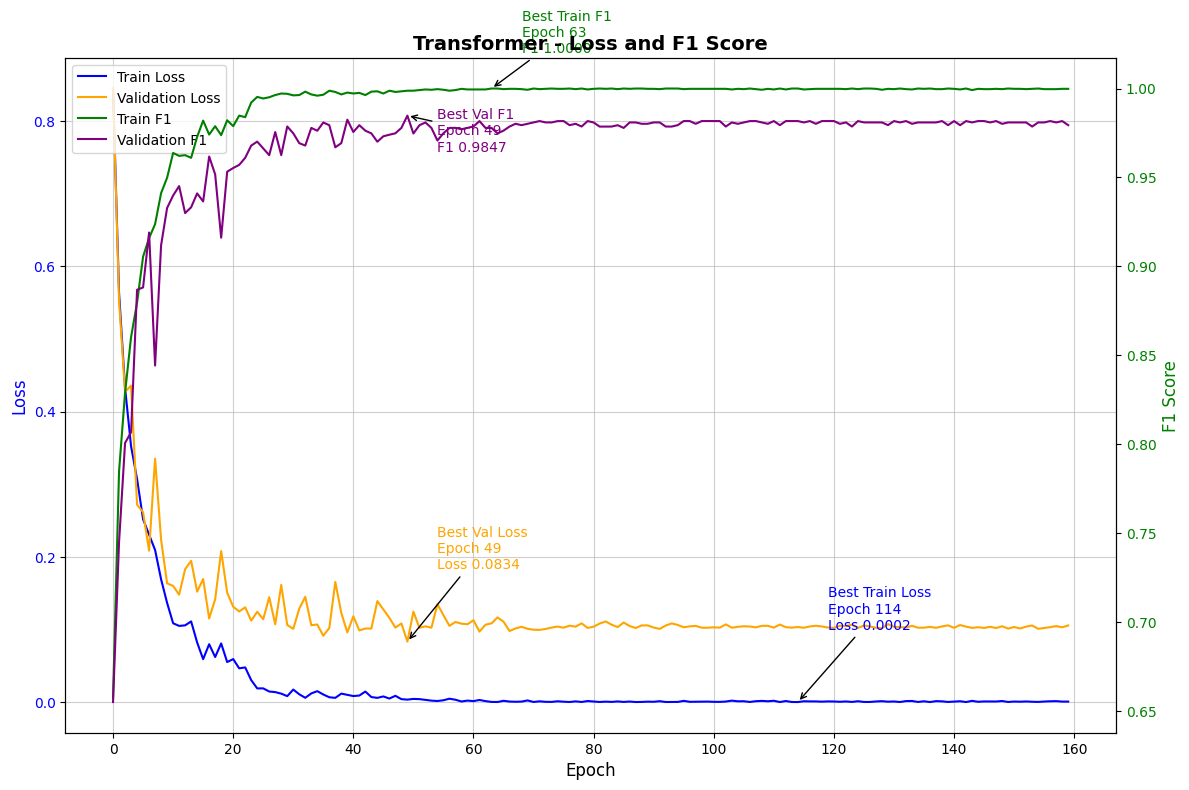

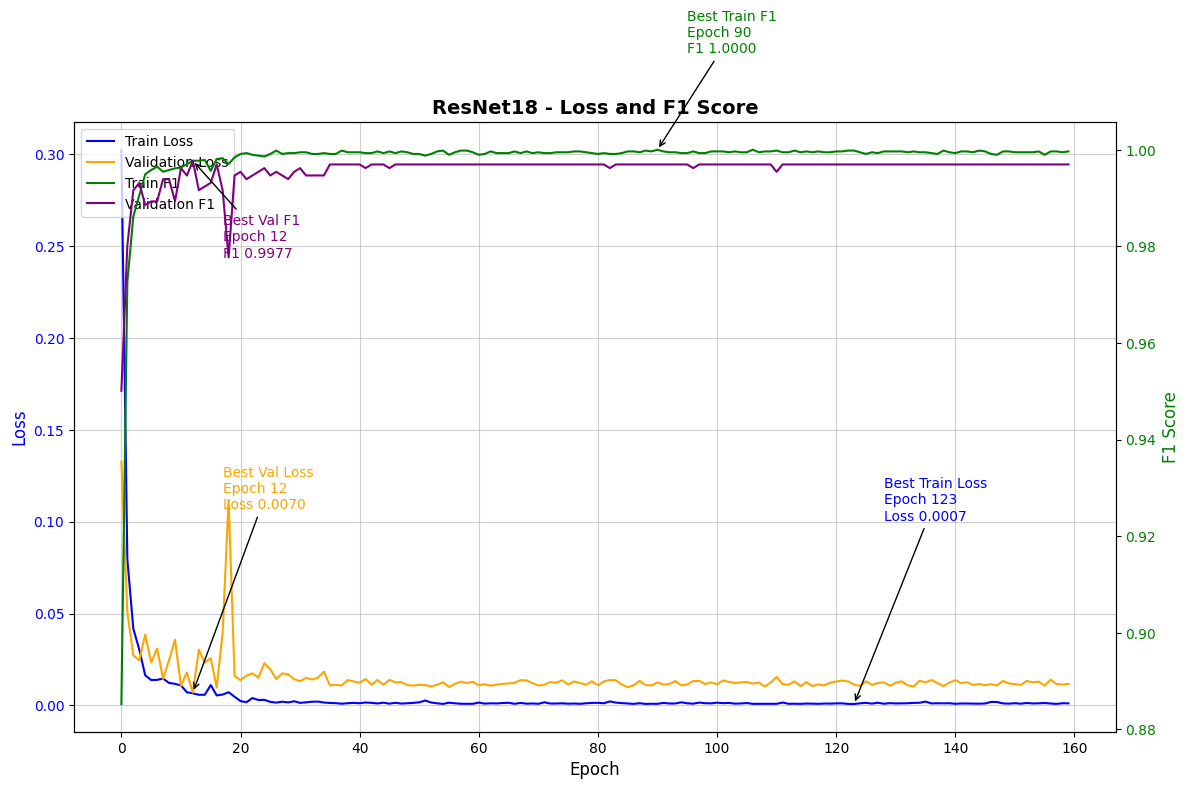

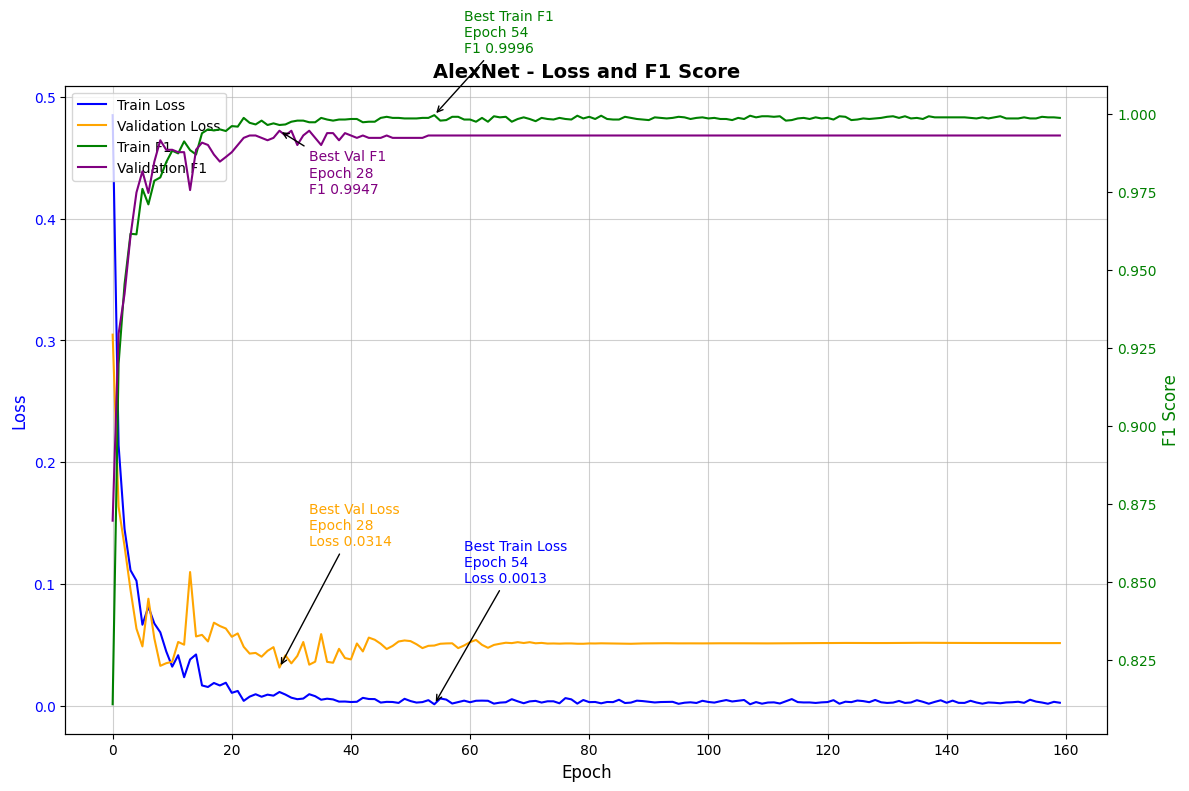

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

for model in models:
    model_folder = os.path.join(folder_path, model)

    # Read data
    f_t_data = pd.read_csv(os.path.join(model_folder, 'f_t.csv'))
    f_v_data = pd.read_csv(os.path.join(model_folder, 'f_v.csv'))
    l_t_data = pd.read_csv(os.path.join(model_folder, 'l_t.csv'))
    l_v_data = pd.read_csv(os.path.join(model_folder, 'l_v.csv'))

    # Extract data
    epochs = f_t_data['Step']
    train_f1 = f_t_data['Value']  # Train F1 Score
    val_f1 = f_v_data['Value']   # Validation F1 Score
    train_loss = l_t_data['Value']  # Train Loss
    val_loss = l_v_data['Value']    # Validation Loss

    # Identify best epochs
    best_train_loss_epoch = train_loss.idxmin()  # Best training loss
    best_val_loss_epoch = val_loss.idxmin()      # Best validation loss
    best_train_f1_epoch = train_f1.idxmax()      # Best training F1
    best_val_f1_epoch = val_f1.idxmax()          # Best validation F1

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot Loss
    ax1.plot(epochs, train_loss, label='Train Loss', color='blue', linestyle='-')
    ax1.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='-')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, linestyle='-', alpha=0.6)

    # Add arrows and labels for best training and validation loss
    ax1.annotate(f'Best Train Loss\nEpoch {epochs[best_train_loss_epoch]}\nLoss {train_loss[best_train_loss_epoch]:.4f}',
                 xy=(epochs[best_train_loss_epoch], train_loss[best_train_loss_epoch]),
                 xytext=(epochs[best_train_loss_epoch] + 5, train_loss[best_train_loss_epoch] + 0.1),
                 arrowprops=dict(facecolor='blue', arrowstyle='->'),
                 fontsize=10, color='blue')

    ax1.annotate(f'Best Val Loss\nEpoch {epochs[best_val_loss_epoch]}\nLoss {val_loss[best_val_loss_epoch]:.4f}',
                 xy=(epochs[best_val_loss_epoch], val_loss[best_val_loss_epoch]),
                 xytext=(epochs[best_val_loss_epoch] + 5, val_loss[best_val_loss_epoch] + 0.1),
                 arrowprops=dict(facecolor='orange', arrowstyle='->'),
                 fontsize=10, color='orange')

    # Secondary axis for F1 Score
    ax2 = ax1.twinx()
    ax2.plot(epochs, train_f1, label='Train F1', color='green', linestyle='-')
    ax2.plot(epochs, val_f1, label='Validation F1', color='purple', linestyle='-')
    ax2.set_ylabel('F1 Score', color='green', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='green')

    # Add arrows and labels for best training and validation F1
    ax2.annotate(f'Best Train F1\nEpoch {epochs[best_train_f1_epoch]}\nF1 {train_f1[best_train_f1_epoch]:.4f}',
                 xy=(epochs[best_train_f1_epoch], train_f1[best_train_f1_epoch]),
                 xytext=(epochs[best_train_f1_epoch] + 5, train_f1[best_train_f1_epoch] + 0.02),
                 arrowprops=dict(facecolor='green', arrowstyle='->'),
                 fontsize=10, color='green')

    ax2.annotate(f'Best Val F1\nEpoch {epochs[best_val_f1_epoch]}\nF1 {val_f1[best_val_f1_epoch]:.4f}',
                 xy=(epochs[best_val_f1_epoch], val_f1[best_val_f1_epoch]),
                 xytext=(epochs[best_val_f1_epoch] + 5, val_f1[best_val_f1_epoch] - 0.02),
                 arrowprops=dict(facecolor='purple', arrowstyle='->'),
                 fontsize=10, color='purple')

    # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

    # Title and layout
    plt.title(f'{model} - Loss and F1 Score', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
